<a href="https://colab.research.google.com/github/MayerT1/AIA_Project/blob/main/Tif_mosaic_helper_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rasterio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 22.9 MB/s eta 0:00:00


In [2]:
from google.colab import files

# This will allow you to upload multiple .tif files from your computer
uploaded = files.upload()  # Upload both .tif files


Saving stackedResampled_X-0000000000-0000000000.tif to stackedResampled_X-0000000000-0000000000.tif
Saving stackedResampled_X-0000000000-0000005888.tif to stackedResampled_X-0000000000-0000005888.tif


In [3]:
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
import matplotlib.pyplot as plt

# Load the .tif files using rasterio
file1 = 'stackedResampled_X-0000000000-0000000000.tif'   # Replace with actual file names
file2 = 'stackedResampled_X-0000000000-0000005888.tif'

# Open the two images using rasterio
src1 = rasterio.open(file1)
src2 = rasterio.open(file2)

# Combine the two datasets into a list
src_files_to_mosaic = [src1, src2]

# Merge the datasets into a mosaic
mosaic, out_trans = merge(src_files_to_mosaic)

# Check the shape of the mosaic
print(f"Mosaic shape: {mosaic.shape}")


Mosaic shape: (33, 4006, 6238)


TypeError: Invalid shape (4006, 6238, 33) for image data

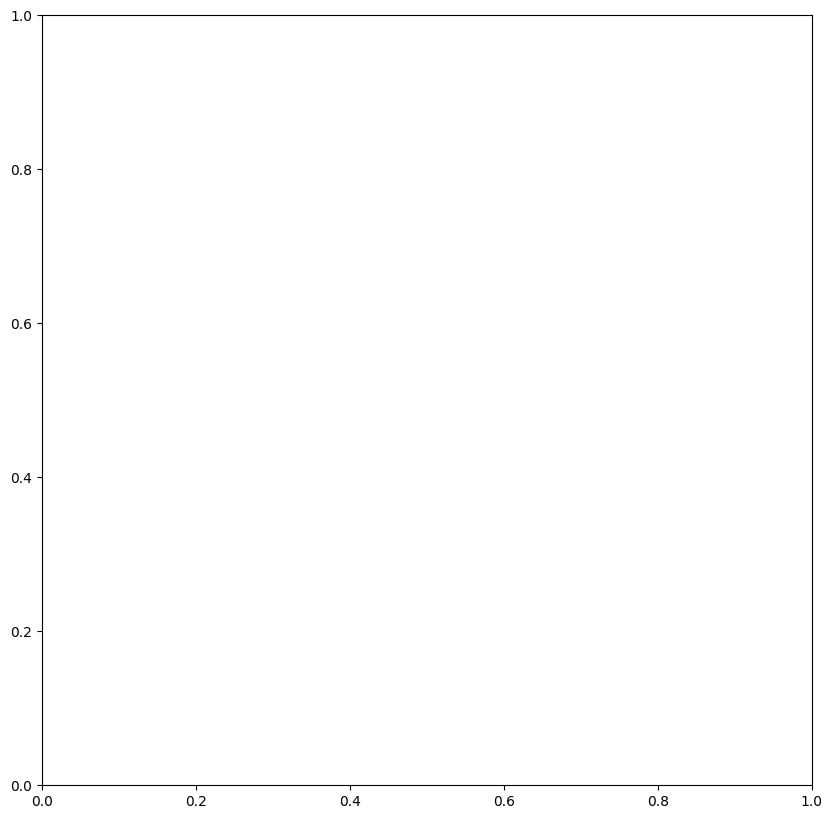

In [5]:
# Plot the mosaic
plt.figure(figsize=(10, 10))
show(mosaic, cmap='terrain')
plt.title('Mosaic of Two TIF Images')
plt.show()


In [6]:
from rasterio.transform import from_origin
from rasterio.enums import Resampling

# Define metadata based on one of the input images
out_meta = src1.meta.copy()

# Update the metadata to reflect the number of bands and the new size
out_meta.update({
    "driver": "GTiff",
    "height": mosaic.shape[1],
    "width": mosaic.shape[2],
    "transform": out_trans,
})

# Save the mosaic as a new .tif file
output_file = "mosaic_output.tif"
with rasterio.open(output_file, "w", **out_meta) as dest:
    dest.write(mosaic)

print(f"Mosaic saved as {output_file}")


Mosaic saved as mosaic_output.tif


In [7]:
from google.colab import files

# Download the mosaic .tif file
files.download(output_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>